In [75]:
2

2

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Observación general de datos

In [77]:
# Opening the dataset with pandas
train = pd.read_csv('properties_colombia_train.csv')

In [78]:
train.head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [79]:
# The dataset has 197549 rows and 27 columns.
train.shape

(197549, 27)

In [80]:
# As we can see several columns from the dataset have null values. They will be studied with more detail 
# in order to understand how to manage them.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

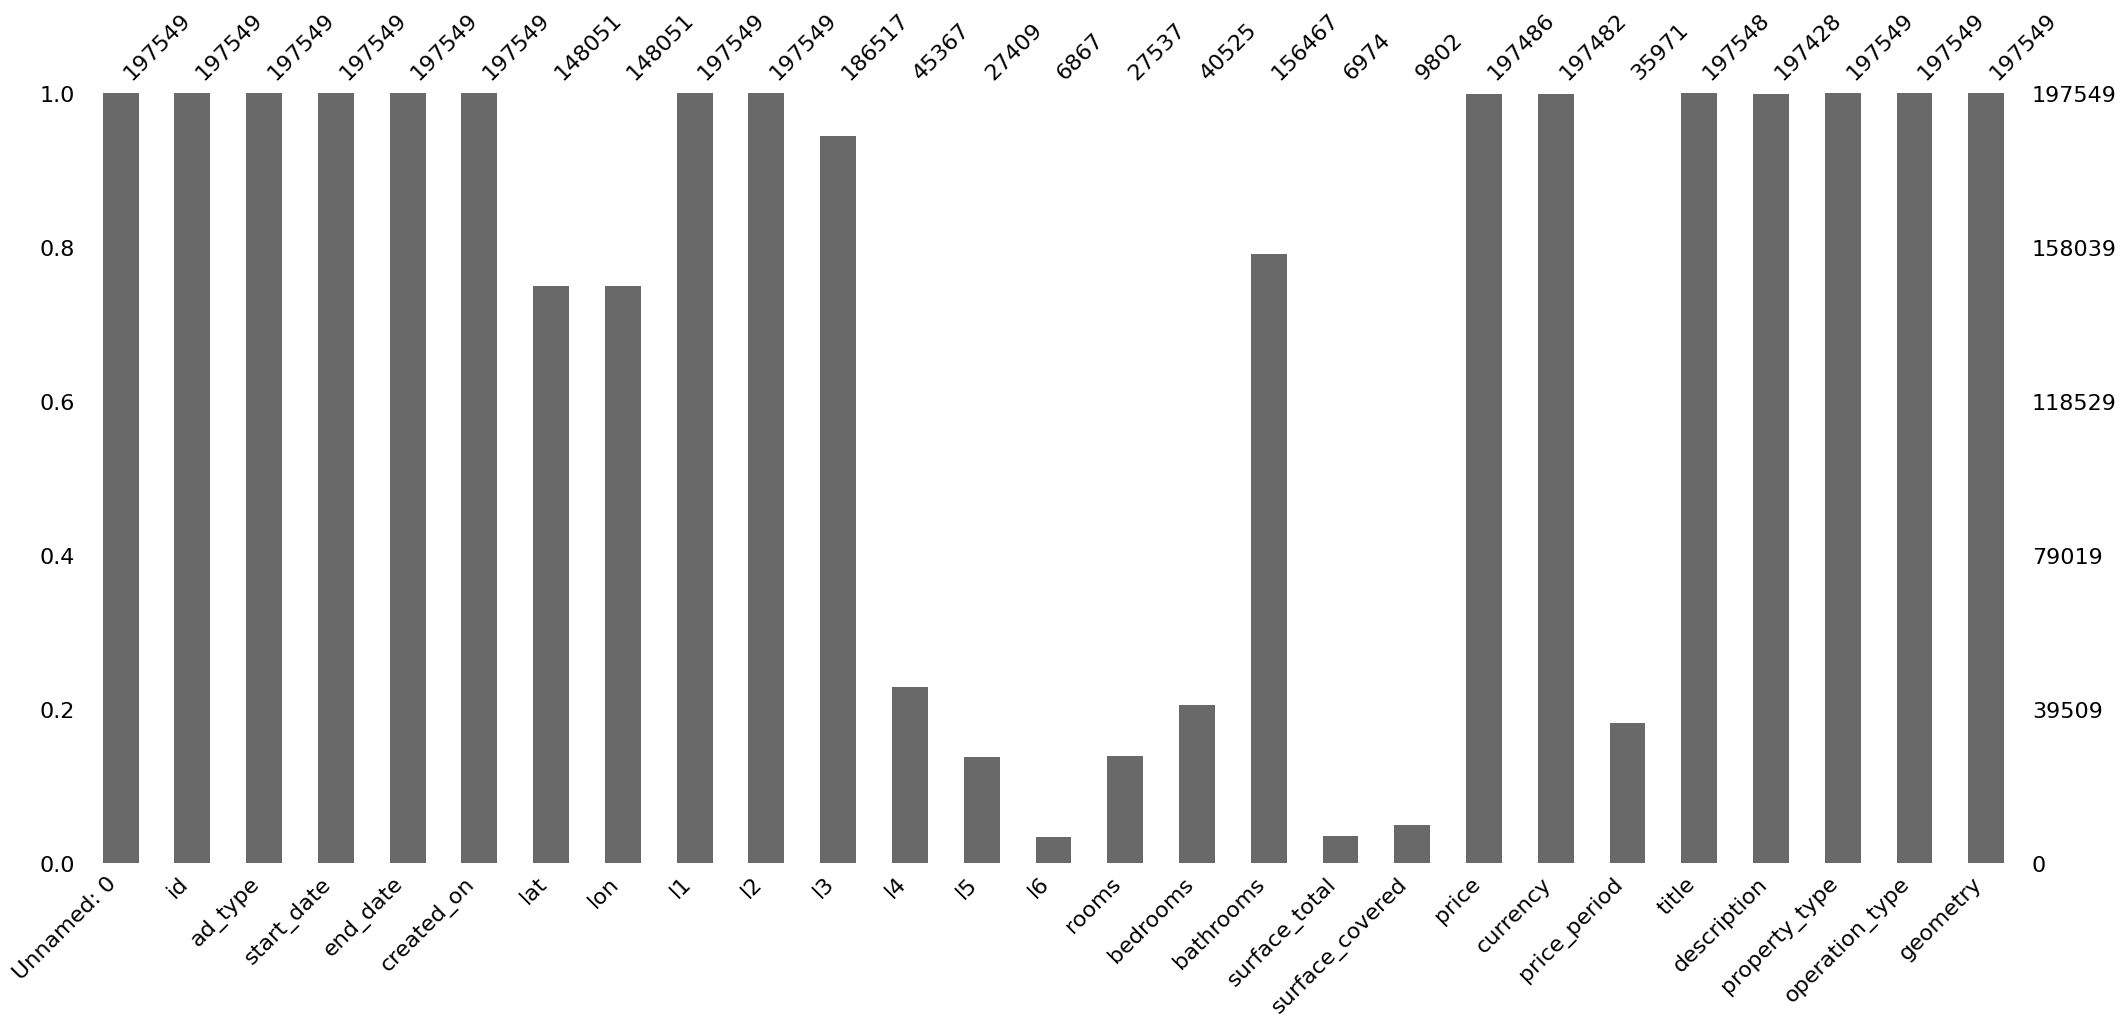

In [81]:
# We will use the missingno library to see the null values in an illustrative way.
import missingno as msno

msno.bar(train)
plt.show()

In [82]:
# In order to clean the dataframe some columns will be deleted because different factors that are explained below:

# Unnamed: 0: As this column has no description and is imported when opening the data we proceed to erase it.

# id: Is the value to identify each property and does not have incidence in the price of properties.

train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [83]:
# A first step into the EDA (exploratory data analysis) is to verify if we have instances that are repeted.
# According to the following code we do not have properties that are duplicated.

# We can see that if we take out the 'id' and 'Unnamed: 0' columns, there are several entries with exactly the same data. This is because some properties are
# re-published when the publication period ends.

# As we can see, we have 504 properties that have been re-published, increasing the data with repeated records. 
train.duplicated().value_counts()

False    197045
True        504
dtype: int64

In [84]:
'''# We obtain the index of the properties that are duplicated and use them to drop the repeated records.
repeated_properties = train[train.duplicated() == True].index
train.drop(repeated_properties, axis = 0, inplace=True)

# After deleting the dupliacated records we have 197045 rows.
train.shape'''

'# We obtain the index of the properties that are duplicated and use them to drop the repeated records.\nrepeated_properties = train[train.duplicated() == True].index\ntrain.drop(repeated_properties, axis = 0, inplace=True)\n\n# After deleting the dupliacated records we have 197045 rows.\ntrain.shape'

## Null Values Transformation/Imputation

In [85]:
# We change the format of the column price in order to see it easily
#train.price = train.price.apply(lambda x: '%.2f'%x)

In [86]:
# Ad the ad_type column just have one value for all the records we proceed to erase it as it is not meaningful for the model.
train.ad_type.value_counts()
train.drop('ad_type', axis=1, inplace=True)

In [87]:
# As the start_date column and the created_on columns are the same we proceed to drop one of the 2 columns
train[train.start_date != train.created_on]
train.drop('created_on',axis=1,inplace=True)

In [88]:
# Then we transform the date columns to datetime variables.
train['start_date'] = train['start_date'].apply(lambda x: pd.to_datetime(x))

# For the end_date that has dates with 9999 as year it is not possible to simply change it to datetime type. Therefore, some different transformation has to be executed.
# As these variables are not going to be used in the ML model nor influence it, these values are arbitrary changed for the 2022 year. 
train['end_date'] = train['end_date'].apply(lambda x: pd.to_datetime(x) if x[:4]!='9999'else pd.to_datetime(x.replace("9999","2022")))

verificar if operation type es igual en todos los registros aca y en caso de que si poner para eliminar

In [89]:
# Renaming some columns for a suitable name
train.rename(columns={'l1':'pais', 'l2':'departamento', 'l3':'municipio', 'l4':'sector', 'l5':'sector_bogota', 'lat':'latitud', 'lon':'longitud'}, inplace=True)

#### Latitude and longitude columns (latitud, longitud)

In [90]:
# To fill the empty latitudes and longitudes in the dataframe we are going to use the library Geopy as the library allows to locate the coordinates of addresses, cities, countries,
# and landmarks across the globe using third-party geocoders and other data sources.

# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API: Nominatim indexes named features within the OpenStreetMap.
geolocator = Nominatim(user_agent="MyApp")

# Creation of a variable with location function. The variable will return geographic data from the inserted record. 
# --> Medellín as an example.
location = geolocator.geocode('Medellín')

# Using the latitude and longitude columns from the data returned, we obtain this values for Medellín
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)
print(location)

The latitude of the location is:  6.2443382
The longitude of the location is:  -75.573553
Medellín, Valle de Aburrá, Antioquia, 0500, Colombia


In [91]:
# To do this we are going to use the pais and departamento colums as they are complete columns.

# Using concatenate strings we create a variable containing records made of the departamento and country.
localization = train.departamento.str.cat(train.pais, sep=', ')
train['localization'] = localization

# Then, we obtain a list of unique records in the column departamento. This list will be used to obtain the latitute and longitud of the different departments (departamentos) of our data.
# We use the pais column in the concatenation in order to get coordinates from Colombia and not from another country with locations with the same name.
departamento = list(train['departamento'].unique())

# Variable with the unique records of 'departamento, pais' e.g 'Antioquia, Colombia' for which the latitude and longitude will be found.
list_unique_locations = list(train['localization'].unique())

# Creation of empty list to save the latitude and longitude records.
list_coor_lat = []
list_coor_lon = []

# for cicle to obtain the atitude and longitude of the unique location records. The unique locations go through the location geolocator to obtain the geographic area.
for i in list_unique_locations:
    location = geolocator.geocode(i)
    list_coor_lat.append(location.latitude)
    list_coor_lon.append(location.longitude)

In [92]:
# with the previous records we create a Dataframe containing the unique location records and its latitude and longitude.
data = pd.DataFrame()
data['localization'] = departamento
data['latitude_l'] = list_coor_lat
data['longitude_l'] = list_coor_lon

# Before changing this empty values we have 49498 records without data for 'latitud' and 'longitud' columns.
train[train.latitud.isnull() == True].shape

(49498, 24)

In [93]:
train

,start_date,end_date,latitud,longitud,pais,departamento,municipio,sector,sector_bogota,l6,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,localization
0,2020-12-14,2022-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),"Antioquia, Colombia"
1,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),"Cundinamarca, Colombia"
2,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),"Cundinamarca, Colombia"
3,2020-11-23,2020-11-30,NaN,NaN,Colombia,Santander,Bucaramanga,NaN,NaN,NaN,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,"Santander, Colombia"
4,2020-10-06,2020-10-07,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,NaN,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,"Antioquia, Colombia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,2022-12-31,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,Zona Suroccidental,Kennedy,NaN,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),"Cundinamarca, Colombia"
197545,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,Zona Chapinero,Chapinero,El Retiro,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),"Cundinamarca, Colombia"
197546,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,NaN,NaN,NaN,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),"Valle del Cauca, Colombia"
197547,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,Zona Occidental,Fontibón,NaN,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),"Cundinamarca, Colombia"


In [94]:
# Using the train and data dataframes we are going to fill the empty records with geographic information gotten in the previous steps.

# We do this with a for cicle that iterates train.latitud, if there is an NaN space we enter anothe for cicle that iterates data['localization'].

# If the record in the train.departamento column match the departamento in the dataframe Data (the dataframe with geographic information),
# the empty record in train.latitud and train.longitud will be inputed with the 'latitud' and 'longitud' from the correct departamet (departamento)
# from the data dataframe.

# first for cycle.
for index_r, record in enumerate(train.latitud):
    
    # If the record is NaN in train.latitud we continue with another for cycle.
    if np.isnan(train.latitud[index_r]) and np.isnan(train.longitud[index_r]):
        
        # second for cycle.
        for index_d, departamento in enumerate(data['localization']):
            
            # If the records match, the NaN records are completed with the geographic information of the correct department.
            if train.departamento[index_r] == departamento:
                
                train['latitud'][index_r] = data.latitude_l[index_d]
                train['longitud'][index_r] = data.longitude_l[index_d]

# we chech that the NaN records are 0 now.
train[train.latitud.isnull() == True].shape

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\28429328.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['latitud'][index_r] = data.latitude_l[index_d]
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\28429328.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['longitud'][index_r] = data.longitude_l[index_d]


(0, 24)

In [95]:
# After the p´reviuos steps we do not have empty records for the columns latitud and longitud anymore.
train[train.latitud.isnull() == True].shape

(0, 24)

In [96]:
# We delete the column train.localization because we dont need it after.
train.drop('localization', axis=1, inplace=True)

In [97]:
train.duplicated().value_counts()

False    197045
True        504
dtype: int64

In [98]:
'''# We obtain the index of the properties that are duplicated and use them to drop the repeated records.
repeated_properties = train[train.duplicated() == True].index
train.drop(repeated_properties, axis = 0, inplace=True)

# After deleting the dupliacated records we have 197045 rows.
train.shape'''

(197045, 23)

In [99]:
train.duplicated().value_counts()

False    197045
dtype: int64

In [100]:
5/0

ZeroDivisionError: division by zero

#### Designation of target column

In [101]:
# From the 197549 records there are 8 records with currency in USD. This 8 records accout for less than 0.5 % of the data, therefore, they represent a diminute fraction of the properties. Hence, they are dropped because
# they do not influence the dataset and make noise.

# Using the index of the records with USD as currency we proceed to clean de Train Dataset.
train.drop((train[train.currency == 'USD'].index), axis=0, inplace=True)

# We assing a variable with the mean price of the properties to know if they are expensive o cheap.
avg_price = train.price.mean()

# Cretion of variable target to fill the dataframe
target = train.price.apply(lambda x: 1 if x > avg_price else 0) # target = train.price.apply(lambda x: 1 if x > train.price.mean() else 0)

# It works without assingning the mean to a variable but it takes longer.
# target = train.price.apply(lambda x: 1 if x > train.price.mean() else 0)

# Creation of the target column in the dataframe
train['target'] = target
train.head(3)

,start_date,end_date,latitud,longitud,pais,departamento,municipio,sector,sector_bogota,l6,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0


In [102]:
# Counting how many expensive = 1 and cheap = 0 properties we have.
train['target'].value_counts()

0    150793
1     46244
Name: target, dtype: int64

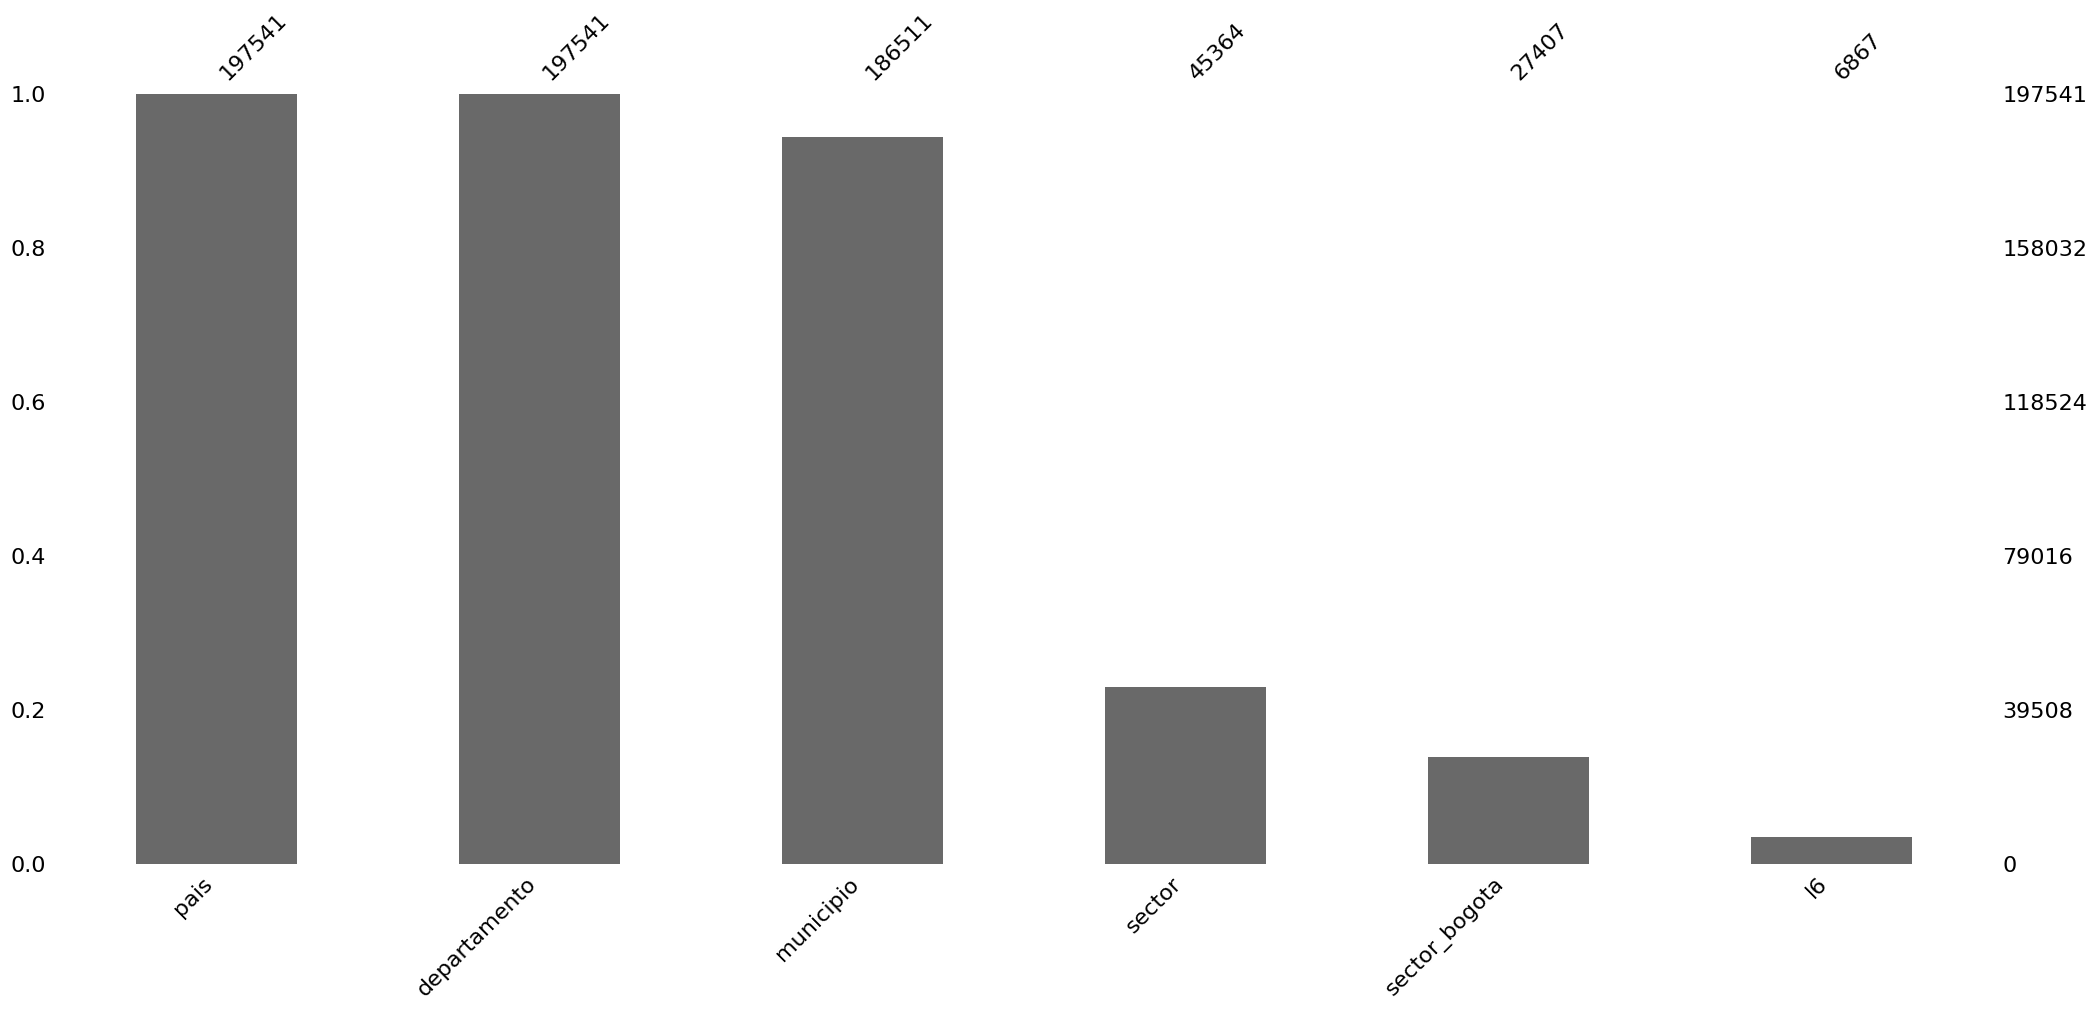

In [ ]:
msno.bar(train[['pais', 'departamento', 'municipio', 'sector', 'sector_bogota', 'l6']])
plt.show()

#### Latitude and longitude properties that are whitin Colombia

In [103]:
# Usign the geopandas and ploty libraries we are going to check if we have properties that are out of Colombia
import geopandas as gpd
import plotly.express as px

In [104]:
# First we create a copy of the original dataframe without the null spaces in the column geometry
train_coor = train[train.geometry != 'POINT EMPTY']

# At the same time we save the index of the records that has no information about its coordinates in order not to lose valuable.
records_no_coordinates = train[train.geometry == 'POINT EMPTY'].index

# Creation of a variable with an array designed to store shapely geometry objects.
gs = gpd.GeoSeries.from_wkt(train_coor.geometry)

# Creation of a Dataframe with a column geometry. The geometry variable is the coordinates from our properties in a 2 dimensional coordinate system
# This Dataframe will be used to plot the map with the location of properties in colombia
train_geo = gpd.GeoDataFrame(train_coor, geometry=gs)

# As we alredy have the latitude (column lat) and longitud (column lon) as points in the column geometry, there is no neccesity for them in the dataframe

In [105]:
# Get built in dataset from geopandas with information regarding geographic limits of countries.

world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'Colombian properties Dataset')

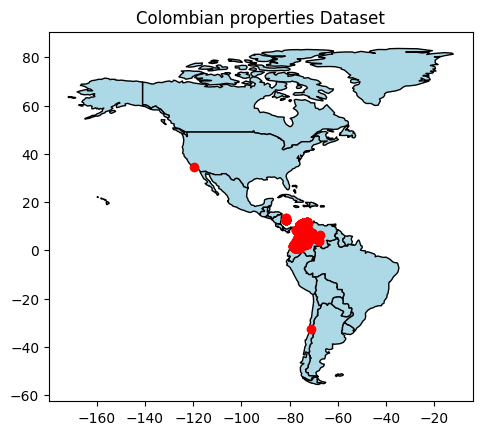

In [106]:
# For plotting the map:

# Map configuration
axis = world_data[(world_data.continent == 'South America') | (world_data.continent == 'North America')].plot(color='lightblue', edgecolor = 'black')

# Call a plot function from matplot lib

# Map with the properties where we can see that we have properties out of Colombia. Some of them are in Argentina and USA. The properties nearby Central America are in San Andres and Providencia,
# that are small islands that belong to Colombia.
train_geo.plot(ax = axis, color = 'red') # Creation of the points with the coordinates.
plt.title('Colombian properties Dataset')

In [107]:
# From the previous graph we can see that above 20° and -20° latitud, are the properties outside Colombia. As they represent just a minimum part of the data (less than 1%) we proceed to eliminate these records.
train_coor[(train_coor.latitud <= -20) | (train_coor.latitud >= 20)].index

# using the index of the records outside Colombia we proceed to drop them.
train.drop((train_coor[(train_coor.latitud <= -20) | (train_coor.latitud >= 20)].index), inplace = True)

Text(0.5, 1.0, 'Colombian properties Dataset')

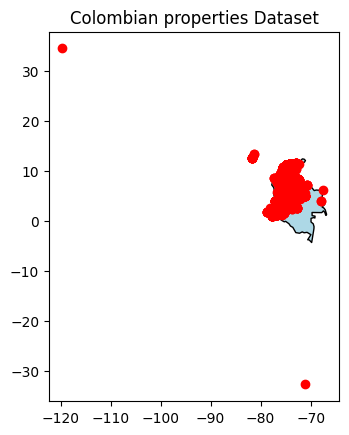

In [108]:
# In order for the user to see the records outside Colombia more clearly, we print another illustration
# clearer for the viewer.
axis = world_data[(world_data.name == 'Colombia')].plot(color='lightblue', edgecolor = 'black')
train_geo.plot(ax = axis,  color = 'red',figsize=(20,20))
plt.title('Colombian properties Dataset')

In [ ]:
'''# Cotinuing using the geopandas tools we can verify with the tool within if the coordinates of the properties are inside Colombia.
colombia = world_data[world_data.name == 'Colombia'].reset_index(drop=True)

# However, with this function we obtain more records that are not in Colombia. This is mainly because 2 reasons.
# The coordinates of San Andres and Providencia are not in the geopandas dataframe, hence, the properties there
# are not taken into account as properties in Colombia.
# The second reason is that the geopandas dataframe does not coinsider the coordinates of the properties in the 
# Bolívar departamento as part of Colombia. Consequently, we stay with the degreee filter above.
train_geo[train_geo.within(colombia.loc[0,'geometry']) == False]'''


"# Cotinuing using the geopandas tools we can verify with the tool within if the coordinates of the properties are inside Colombia.\ncolombia = world_data[world_data.name == 'Colombia'].reset_index(drop=True)\n\n# However, with this function we obtain more records that are not in Colombia. This is mainly because 2 reasons.\n# The coordinates of San Andres and Providencia are not in the geopandas dataframe, hence, the properties there\n# are not taken into account as properties in Colombia.\n# The second reason is that the geopandas dataframe does not coinsider the coordinates of the properties in the \n# Bolívar departamento as part of Colombia. Consequently, we stay with the degreee filter above.\ntrain_geo[train_geo.within(colombia.loc[0,'geometry']) == False]"

In [ ]:
from geopy.geocoders import nominatim
import time
from mpl_toolkits.basemap.test import Basemap
import matplotlib.pyplot as plt

In [ ]:
'''plt.figure(figsize = (30,26))
my_map = Basemap(projection='robin', lon_0=0, lat_0=0)

my_map.drawcoastlines()
my_map.drawcountries()
x, y = my_map(train['longitud'], train['latitud'])
my_map.plot(x, y, color = 'g', marker = 'o', markersize = '1')'''

"plt.figure(figsize = (30,26))\nmy_map = Basemap(projection='robin', lon_0=0, lat_0=0)\n\nmy_map.drawcoastlines()\nmy_map.drawcountries()\nx, y = my_map(train['longitud'], train['latitud'])\nmy_map.plot(x, y, color = 'g', marker = 'o', markersize = '1')"

In [ ]:
'''syp_restriction = ((train_coor.latitud >= 12.4) & (train_coor.latitud <= 13.4)) | ((train_coor.longitud >= -81.74) & (train_coor.longitud <= -81.34))
col_restriction = ((train_coor.latitud >= 2.32) & (train_coor.latitud <= 8.51)) | ((train_coor.longitud >= -78.7) & (train_coor.longitud <= -68.2))
train_coor[syp_restriction | col_restriction]'''

'syp_restriction = ((train_coor.latitud >= 12.4) & (train_coor.latitud <= 13.4)) | ((train_coor.longitud >= -81.74) & (train_coor.longitud <= -81.34))\ncol_restriction = ((train_coor.latitud >= 2.32) & (train_coor.latitud <= 8.51)) | ((train_coor.longitud >= -78.7) & (train_coor.longitud <= -68.2))\ntrain_coor[syp_restriction | col_restriction]'

In [ ]:
# Comprobación San Andres
'''train_coor_san = train[(((train.lat >= 12.4) & (train.lat <= 13.4)) | ((train.lon >= -81.74) & (train.lon <= -81.34))) & (train.geometry != 'POINT EMPTY')]
gs_2 = gpd.GeoSeries.from_wkt(train_coor_san.geometry)
train_geo_2 = gpd.GeoDataFrame(train_coor_san, geometry=gs_2)

axis = world_data[(world_data.continent == 'South America') | (world_data.continent == 'North America')].plot(color='lightblue', edgecolor = 'black')

train_geo_2.plot(ax = axis, color = 'red') # Creation of the points with the coordinates.
plt.title('San Andres propertiest')
'''

"train_coor_san = train[(((train.lat >= 12.4) & (train.lat <= 13.4)) | ((train.lon >= -81.74) & (train.lon <= -81.34))) & (train.geometry != 'POINT EMPTY')]\ngs_2 = gpd.GeoSeries.from_wkt(train_coor_san.geometry)\ntrain_geo_2 = gpd.GeoDataFrame(train_coor_san, geometry=gs_2)\n\naxis = world_data[(world_data.continent == 'South America') | (world_data.continent == 'North America')].plot(color='lightblue', edgecolor = 'black')\n\ntrain_geo_2.plot(ax = axis, color = 'red') # Creation of the points with the coordinates.\nplt.title('San Andres propertiest')\n"

In [ ]:
5/0

ZeroDivisionError: division by zero

## Outliers

In [ ]:
# Outliers detection will be applicated to the colums rooms, bedrooms, surface_total, surface_covered and price

In [ ]:
# For each of these columns we will find the intequantile range to erase outliers.
q1 = train['rooms'].quantile(.25)
q3 = train['rooms'].quantile(.75)

iqr= q3-q1
bi = q1 - 1.5*iqr
bs = q3 + 1.5*iqr

In [ ]:
# We create a column indicating wich records are outliers
rooms_outlier = train.rooms.apply(lambda x: True if (x>= q3 or x <=  q1) else False)
train.rooms_outlier = rooms_outlier

In [ ]:
# We do the same process for the remaining columns
q1 = train['bedrooms'].quantile(.25)
q3 = train['bedrooms'].quantile(.75)

iqr= q3-q1
bi = q1 - 1.5*iqr
bs = q3 + 1.5*iqr

bedrooms_outlier = train.bedrooms.apply(lambda x: True if (x>= q3 or x <=  q1) else False)
train['bedrooms_outlier'] = bedrooms_outlier


q1 = train['surface_total'].quantile(.25)
q3 = train['surface_total'].quantile(.75)

iqr= q3-q1
bi = q1 - 1.5*iqr
bs = q3 + 1.5*iqr

surface_total_outlier = train.surface_total.apply(lambda x: True if (x>= q3 or x <=  q1) else False)
train['surface_total_outlier'] = surface_total_outlier


q1 = train['surface_covered'].quantile(.25)
q3 = train['surface_covered'].quantile(.75)

iqr= q3-q1
bi = q1 - 1.5*iqr
bs = q3 + 1.5*iqr

surface_covered_outlier = train.surface_covered.apply(lambda x: True if (x>= q3 or x <=  q1) else False)
train['surface_covered_outlier'] = surface_covered_outlier


q1 = train['price'].quantile(.25)
q3 = train['price'].quantile(.75)

iqr= q3-q1
bi = q1 - 1.5*iqr
bs = q3 + 1.5*iqr

price_outlier = train.price.apply(lambda x: True if (x>= q3 or x <=  q1) else False)
train['price_outlier'] = price_outlier

In [ ]:
import re

In [ ]:
bool(re.search('(?<='r'\d)m2', train.title[0]))

In [ ]:
for i in train.title:
    if bool(re.search('(?<='r'\d)m2', train.title[0])):


In [ ]:
palabra = 'holajuan4co.moestas'

In [ ]:
palabra = 'True Hermosa Mansión En El Poblado. Área Construida. 900m2.'

In [ ]:
dato = ''
for j, i in enumerate(palabra):
    try:
        if int(i):
            print('número')
            for k in range(5):
                if palabra[j-k] == '.':
                    break
                dato = dato + str(palabra[j-(5-k)])
                if k == '.':
                    break
            dato = dato + str(i)
            for k in range(1, 5):
                if k == '.':
                    break
                dato += str(palabra[j+k])
                
            print(dato)
    except:
        continue

In [ ]:
train.title[0]

In [ ]:
type(train.title[5])

In [ ]:
print(re.search('(?<='r'\d)m2', train.title[115]))

In [ ]:
type(train.surface_covered[0])

In [ ]:
train.surface_covered.shape

In [ ]:
train.surface_covered.value_counts()

In [ ]:
train.surface_covered[train.surface_covered.isnull() == True]

In [ ]:
train.surface_covered.isnull()

In [ ]:
train.surface_covered.isna().value_counts()

In [ ]:
train.surface_covered[train.surface_covered.isna() == True]

In [ ]:
variable.isna().value_counts()

In [ ]:
variable[variable != 0].count()

In [ ]:
11576 -9802

In [ ]:
train.surface_covered[0]

In [ ]:
type(train.surface_covered[0])

In [ ]:
train.title[244]

In [ ]:
train.surface_covered[0]

In [ ]:
for i in range(1,4):
    print(train.description[i])
    print('bedrooms:',train.bedrooms[i])
    print('bathrooms:',train.bathrooms[i])
    print('surface_total:',train.surface_total[i])
    print('surface_covered:',train.surface_covered[i])
    print('title:',train.title[i])
    print()
    print()

In [ ]:
z = train.description.apply(lambda x: str(x).replace(',','').replace('.','').strip().replace(' ','').replace('<b>','').lower())

In [ ]:
# Code to obtain aditional information for rooms

z = train.description.apply(lambda x: str(x).replace(',','').replace('.','').strip().replace(' ','').replace('<b>','').lower())
import re

train.surface_covered = train.surface_covered.fillna(0)

train.title = train.title.apply(lambda x: str(x).replace(',','').replace('.','').lower())

for j,i in enumerate(z):
    if type(z[j]) == str and bool(re.search('(?<='r'\d)habitaci', z[j])):
        lista=[palabra for palabra in z[j] if 'not' not in palabra]
        for indice,elemento in enumerate (lista):
            if elemento=='m' and lista[indice+1]=='2':
                a=indice
                b=1
                numero=[]
                #if lista[indice-b] == ' ':
                    #b += 1
                while any(map(str.isdigit, lista[indice-b]))==True:
                    #print (lista[indice-b])
                    numero.insert(0,lista[indice-b])
                    b+=1
                nuevo="".join(numero)

                print(j,int(nuevo))
    if train.surface_covered[j] == 0:
        train.surface_covered[j] = int(nuevo)
        nuevo = 0

0 900
0 2154
0 900
9 189
14 0
19 66
69 1000
69 1000
99 54
112 80
142 113


C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_29976\1135758986.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.surface_covered[j] = int(nuevo)


IndexError: list index out of range

In [ ]:
train = pd.read_csv('properties_colombia_train.csv')

In [ ]:
# Code to obtain aditional information for surface_covered
import re

variable = train.surface_covered.fillna(0)

train.title = train.title.apply(lambda x: str(x).replace(',','').replace('.','').lower())

for j,i in enumerate(train.title):
    if type(train.title[j]) == str and bool(re.search('(?<='r'\d)m2', train.title[j])):
        lista=[palabra for palabra in train.title[j] if 'not' not in palabra]
        for indice,elemento in enumerate (lista):
            if elemento=='m' and len(lista) > indice+1 and lista[indice+1]=='2':
                a=indice
                b=1
                numero=[]
                if lista[indice-b] == ' ':
                    b += 1
                while any(map(str.isdigit, lista[indice-b]))==True:
                    #print (lista[indice-b])
                    numero.insert(0,lista[indice-b])
                    b+=1
                nuevo="".join(numero)

                print(j,nuevo)
    if variable[j] == 0:
        variable[j] = int(nuevo)
        nuevo = 0

0 900
69 1000
115 5300
176 80
193 75
196 1600
244 1715
295 87
327 170
399 850
407 260
413 281
424 52
440 3300
522 27700
553 86
573 80
655 829
740 75
780 70
810 27
823 73
842 98
874 58
896 27000
920 900
991 10589
994 96
1013 130
1050 2400
1130 72
1206 76
1272 259
1282 3333
1517 89
1679 70
1736 2300
1807 75
1844 47
1847 4000
1849 250
2086 96
2208 74
2289 354
2293 63
2332 100
2417 60
2432 24
2462 846
2563 160
2628 107
2699 2614
2822 8000
2898 85
2918 170
2930 97
2931 64
2965 110
2986 3500
2986 5000
3061 2500
3082 163
3087 89
3106 2000
3106 2500
3195 41
3235 3300
3237 7200
3288 698
3398 3200
3407 93
3556 47
3573 2500
3644 80
3691 2253
3691 4951
3698 390
3825 19714
3944 40
4008 210
4021 3900
4099 4681
4145 3400
4242 110
4334 74
4527 34236
4584 100
4586 63
4650 460
4652 98
4763 2560
4871 72
4889 63
4937 83
4989 80
5017 200
5053 997
5059 80
5078 6000
5110 500
5119 8625
5181 192
5272 140
5274 1000
5470 3755
5624 100
5646 647
5686 500
5689 62
5735 275
5742 683
5793 160
5894 84


KeyError: 5902

In [ ]:
values = r"(\d+\.?\d+(?=m2| m2| mts2| metros cuadrados| mts))"

In [ ]:
df

,Item,Price,Is taxed?,Price with Tax
0,Manzana,1.00,No,1.00000
1,Leche,4.20,No,4.20000
2,Papel,5.00,Yes,5.37500
3,Bombilla,3.75,Yes,4.03125


In [ ]:
train

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,Venta,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,Venta,0
3,2020-11-23,2020-11-30,7.000008,-73.250009,Santander,Bucaramanga,6.0,5.0,1.0,991.0,1010.0,Otro,Venta,1
4,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
197545,2020-11-27,2020-12-09,4.668000,-74.055000,Cundinamarca,Bogotá D.C,3.0,1.0,1.0,144.0,17.0,Oficina,Venta,0
197546,2020-10-28,2021-01-02,3.413000,-76.541000,Valle del Cauca,Cali,6.0,5.0,1.0,991.0,1010.0,Otro,Venta,0
197547,2020-08-14,2020-08-14,4.674874,-74.147077,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,Venta,0


In [ ]:
# Code to obtain aditional information for surface_covered
import re

cb = train.surface_covered.fillna(0)

train.title = train.title.apply(lambda x: str(x).replace(',','').replace('.',''))

for j,i in enumerate(train.title):
    if type(train.title[j]) == str and bool(re.search('(?<='r'\d)| m2| mts2| metros cuadrados| mts', train.title[j])):
        lista=[palabra for palabra in train.title[j] if 'not' not in palabra]
        for indice,elemento in enumerate (lista):
            if elemento=='m' and lista[indice+1]=='2':
                a=indice
                b=1
                numero=[]
                if lista[indice-b] == ' ':
                    b += 1
                while any(map(str.isdigit, lista[indice-b]))==True:
                    #print (lista[indice-b])
                    numero.insert(0,lista[indice-b])
                    b+=1
                nuevo="".join(numero)

                print(j,int(nuevo))
    if train.surface_covered[j] == 0:
        train.surface_covered[j] = nuevo
        nuevo = 0

0 900
69 1000
115 5300
196 1600
244 1715
399 850
407 260
413 281
440 3300
522 27700
553 86
896 27000
920 900
991 10589
1050 2400
1130 72
1282 3333
1736 2300
1844 47
1847 4000
1849 250
2086 96
2289 354
2432 24
2699 2614
2822 8000
2918 170
2965 110
2986 3500
2986 5000
3061 2500
3082 163
3106 2000
3106 2500
3195 41
3235 3300
3237 7200
3288 698
3407 93
3556 47
3573 2500
3691 2253
3691 4951
3698 390
4008 210
4021 3900
4099 4681
4242 110
4334 74
4527 34236
4650 460
4763 2560
5017 200
5078 6000
5110 500
5181 192
5274 1000
5470 3755
5686 500
5689 62
5735 275
5742 683
5793 160


KeyError: 5902

In [ ]:
# Module with fuctions that allow the user to check if particular strings matches a given refular expression or
# viceversa.
import re

In [ ]:
# Code to obtain aditional information for rooms

# Normalization of the description column using string methods, the function apply and lambda expression.
z = train.description.apply(lambda x: str(x).replace(',','').replace('.','').strip().replace(' ','').replace('<b>','').lower())


train.surface_covered = train.surface_covered.fillna(0)


for i,j in enumerate(z):
    if type(z[i]) == str and bool(re.search('(?<='r'\d)habitaci', z[i])):
        list_letters=[letters for letters in z[i] if 'not' not in letters]
        for index,element in enumerate (list_letters):
            if element=='m' and list_letters[index+1]=='2':
                a=index
                b=1
                number=[]
                #if lista[indice-b] == ' ':
                    #b += 1
                while any(map(str.isdigit, list_letters[index-b]))==True:
                    #print (lista[indice-b])
                    number.insert(0,list_letters[index-b])
                    b+=1
                number="".join(number)

                print(i,int(number))
    if train.surface_covered[i] == 0:
        train.surface_covered[i] = int(number)
        number = 0

In [ ]:
a = ['a','v','b','d','g']

In [ ]:
''.join(a)

In [ ]:
train

### Modelo

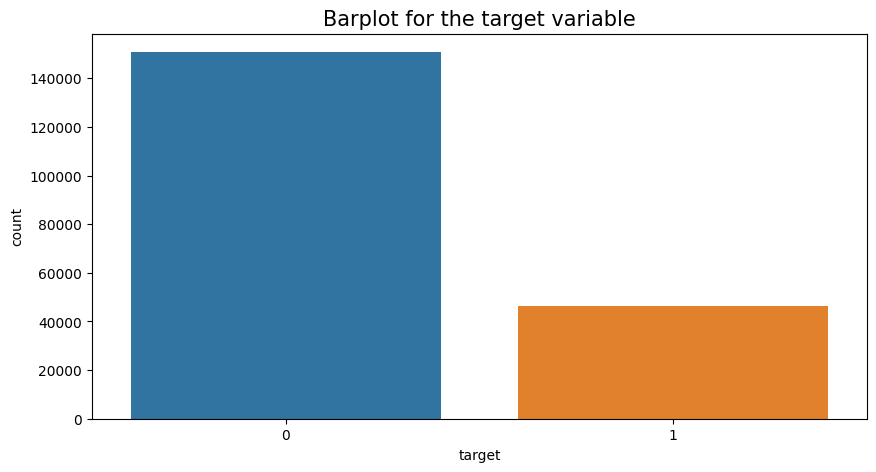

In [109]:
# Illustration of the distribution for the expensive and cheap properties in Colombia.
# There are about 140000 properties catalogued as cheap and around 50000 clasifies as expensive.
# The data seems to be balanced
plt.figure(figsize = (10,5))
sns.countplot(x = 'target', data=train, label='Count')
plt.title('Barplot for the target variable', fontsize = 15)
plt.show()

In [ ]:
#sns.pairplot(train, hue='target')

In [110]:
train.corr()

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,target
latitud,1.000000,0.286709,-0.090132,-0.084529,-0.099824,0.006802,0.003287,-0.015723,-0.034224
longitud,0.286709,1.000000,-0.095893,-0.054159,-0.019922,0.009576,-0.006416,0.036263,0.038696
rooms,-0.090132,-0.095893,1.000000,0.999130,0.664424,0.086619,0.051583,0.178010,0.246284
bedrooms,-0.084529,-0.054159,0.999130,1.000000,0.579110,0.071450,0.046264,0.121691,0.185918
bathrooms,-0.099824,-0.019922,0.664424,0.579110,1.000000,0.104708,0.052931,0.443429,0.539613
surface_total,0.006802,0.009576,0.086619,0.071450,0.104708,1.000000,0.711513,0.414640,0.150408
surface_covered,0.003287,-0.006416,0.051583,0.046264,0.052931,0.711513,1.000000,0.206906,0.025292
price,-0.015723,0.036263,0.178010,0.121691,0.443429,0.414640,0.206906,1.000000,0.330479
target,-0.034224,0.038696,0.246284,0.185918,0.539613,0.150408,0.025292,0.330479,1.000000


C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\4272615892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


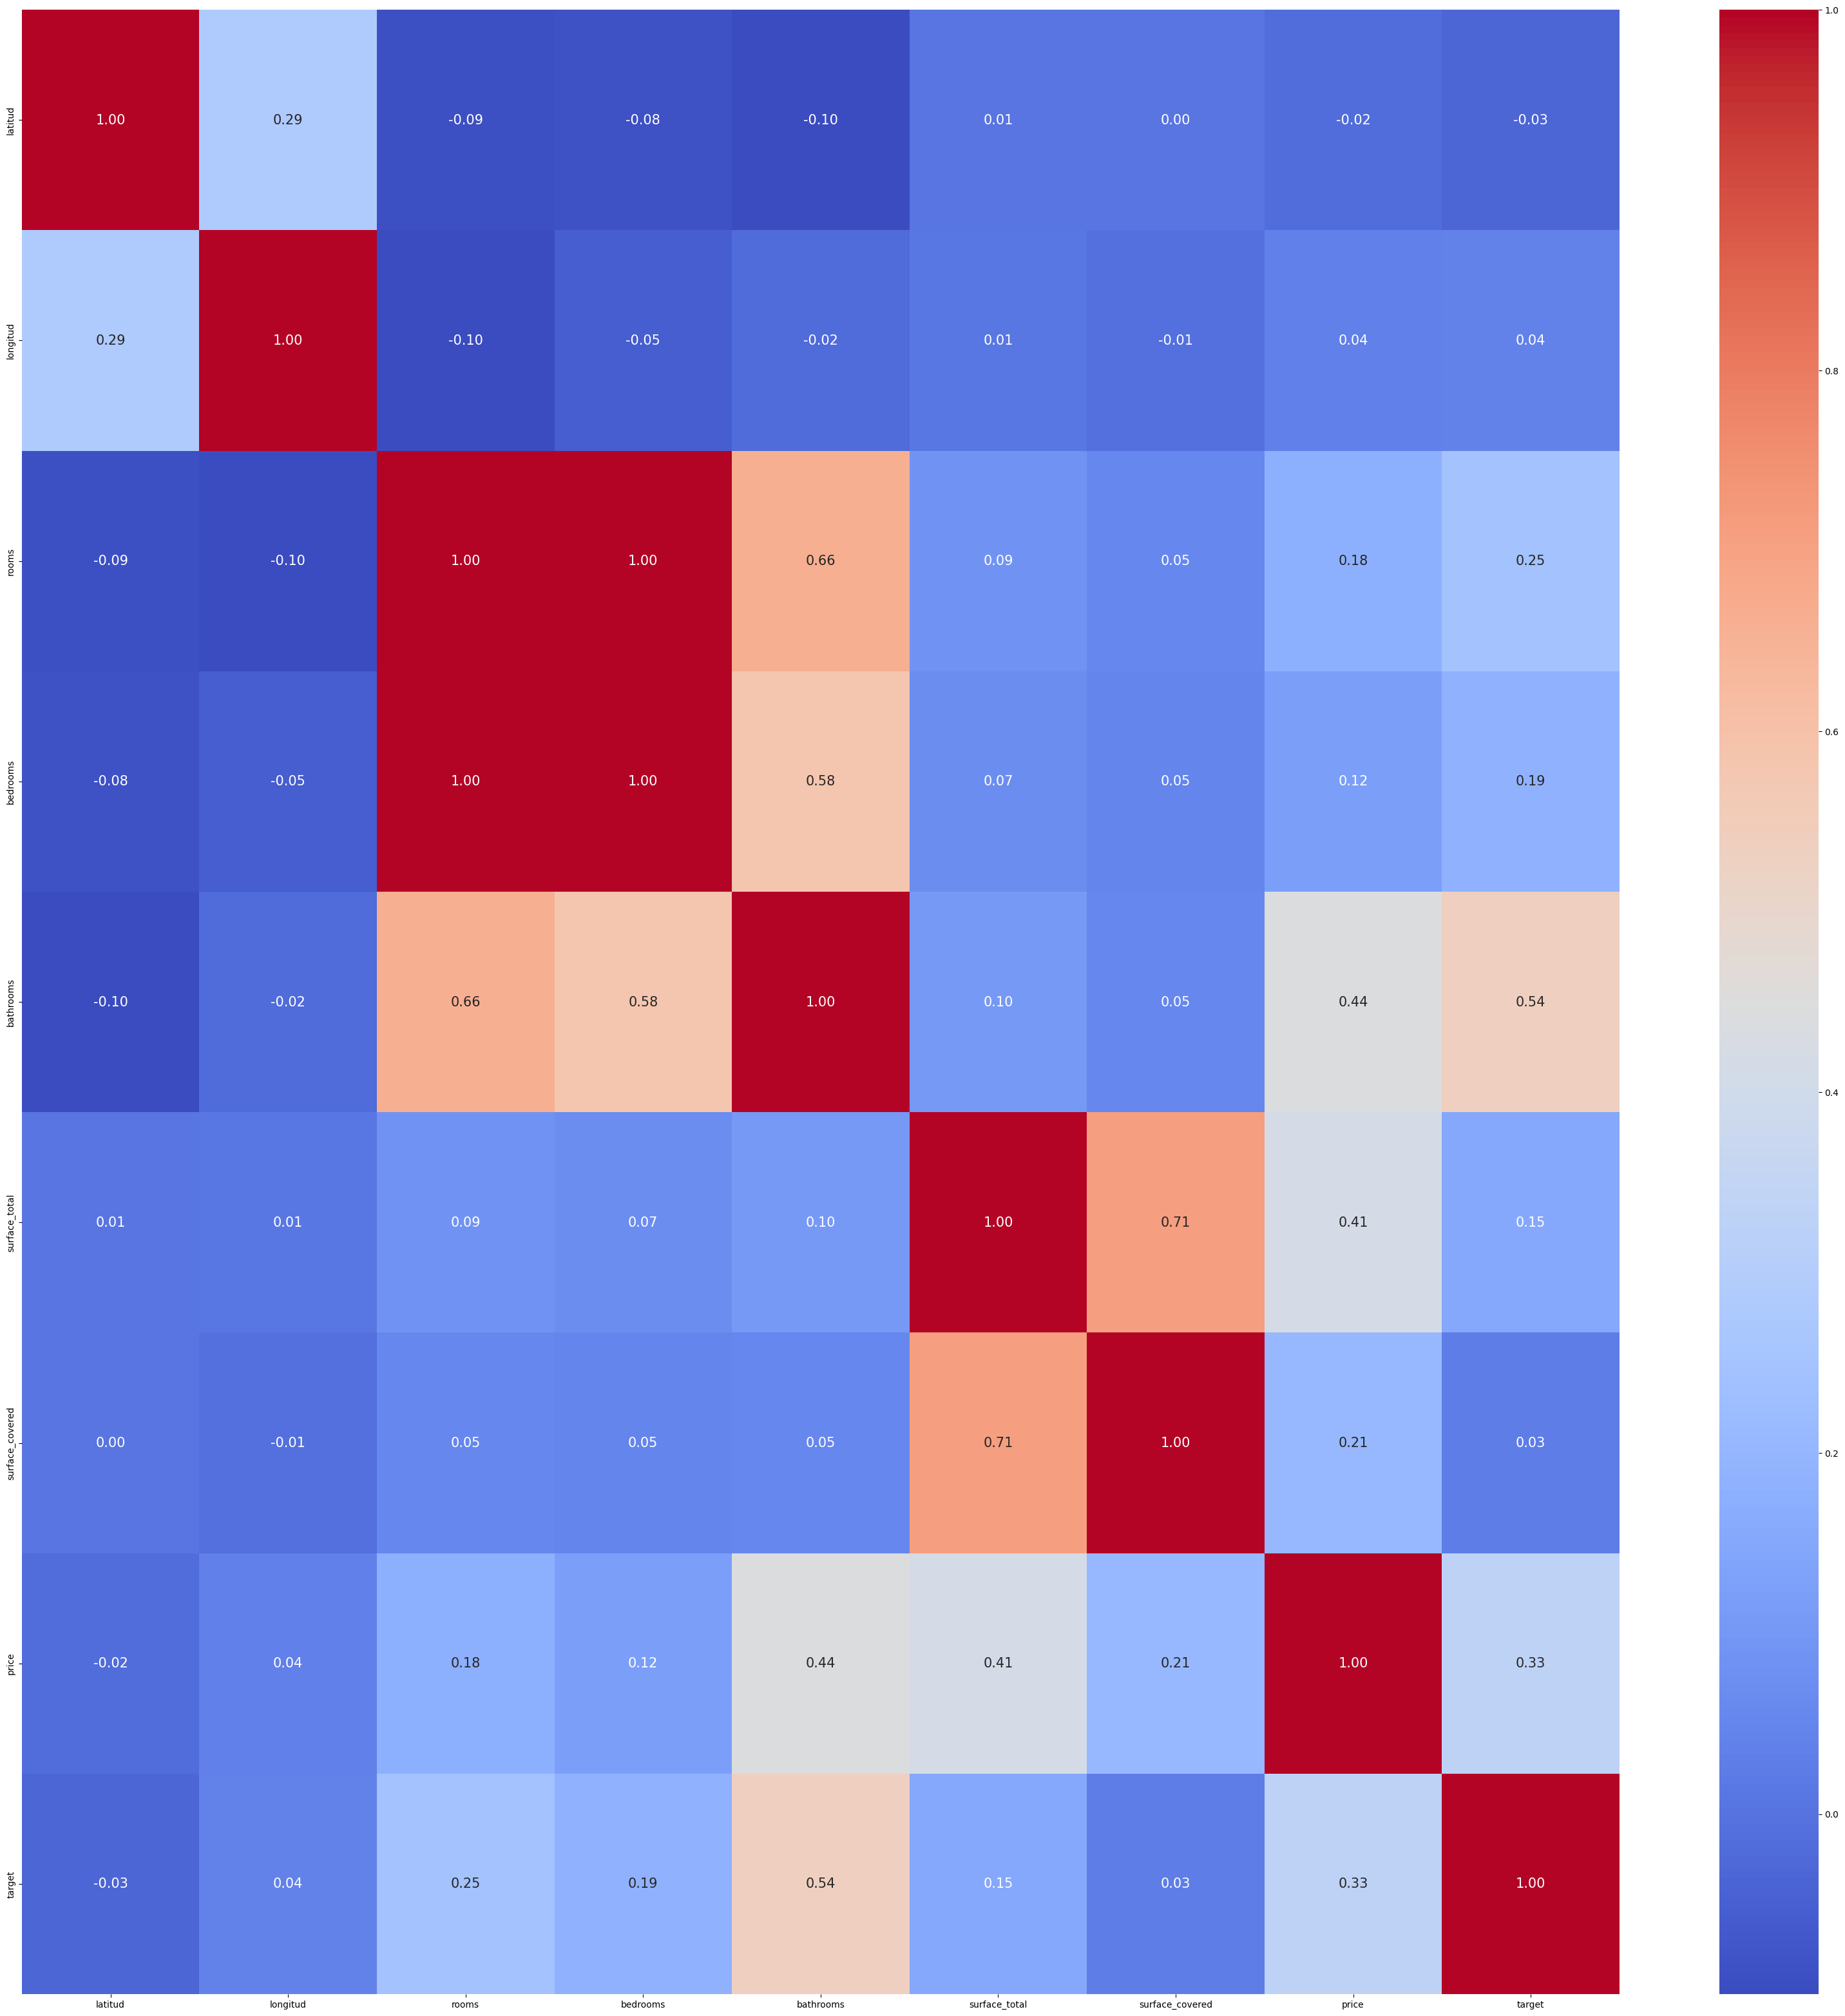

In [111]:

corr = train.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.show()

## Null Values

In [ ]:
# actualizado = train.copy()

In [ ]:
df = train.copy()

In [ ]:
train = actualizado

In [112]:
# In order to clean the dataframe some columns will be deleted because different factors that are explained below:

# pais: In this column all the records are Colombia.As is just one value it does not influence or affect the model.

# Sector: It is dropped because ???

# sector_bogota: This column is dropped due to it only contains information about Bogotá neighboorhouds, not taking into account information for other municipios (provinces).

# l6: contains a diminute proportion of data that can be used. It was not possible to fill null values with information from the column description, hence, it is eliminated.

# price: column used for calculating the target values. It is not used in the test dataset.

# currency: After deleting the records with values equal to USD, all the records are COP. As is just one value it does not influence or affect the model.

# title: This column was used for completing the columns rooms, bedrooms, bathrooms, surface_total, surface_covered. After that can be deleted.

# description: This column was used for completing the columns rooms, bedrooms, bathrooms, surface_total, surface_covered. After that can be deleted.

# operation_type : In this column all the records are Volombia.As is just one value it does not influence or affect the model.

# geometry: This column has records with information of latitude and longitude 

train.drop(['pais', 'sector', 'sector_bogota', 'l6', 'price', 'currency', 'price_period', 'title', 'description', 'operation_type', 'geometry'], axis=1, inplace=True)


In [178]:
train.columns

Index(['start_date', 'end_date', 'latitud', 'longitud', 'departamento',
       'municipio', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'operation_type', 'target'],
      dtype='object')

#### Null values in 'rooms','bedrooms', 'bathrooms', 'surface_total' and 'surface_covered' columns

In [113]:
# Using an additional dataframe we are going to impute the NaN values with the mean of the the following columns rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
# according to the type of property.
# This is done because a large amount of records are missing and we need to improve the data for the ML model. 
# The imputation is done according to the type of property, that is a column with complete records.
# Using this filtered mean allows us to fill empty spaces with a value more similar than just an average mean.

# Firstly, we create an empty dataframe where we will save the mean vallues.
empty = pd.DataFrame()

# Using the function groupby we obtain the mean for each type of property according to the different columns
empty = train.groupby('property_type').mean()

# The information is saved in the empty dataframe
empty = empty[['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].round()

# Checking for the results obtained.
empty

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\2518600482.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  empty = train.groupby('property_type').mean()


,rooms,bedrooms,bathrooms,surface_total,surface_covered
property_type,,,,,
Apartamento,3.0,3.0,2.0,108.0,113.0
Casa,4.0,4.0,3.0,897.0,300.0
Finca,4.0,4.0,4.0,14925.0,30939.0
Local comercial,3.0,1.0,2.0,180.0,160.0
Lote,3.0,1.0,2.0,8979.0,13101.0
Oficina,3.0,1.0,2.0,144.0,121.0
Otro,6.0,5.0,3.0,991.0,1010.0
Parqueadero,4.0,2.0,NaN,496.0,545.0


In [114]:
# Using the dataframe Empty allow us to obtain the mean values for the the type of property according to the different columns.
# This values are kept in separate variables to use them to replace records with NaN values.

# Mean values for rooms by the type of property
r_a     = empty.iloc[0,0]
r_c     = empty.iloc[1,0]
r_f     = empty.iloc[2,0]
r_lc    = empty.iloc[3,0]
r_l     = empty.iloc[4,0]
r_o     = empty.iloc[5,0]
r_ot    = empty.iloc[6,0]
r_p     = empty.iloc[7,0]

print('Values for rooms:',r_a,r_c,r_f,r_lc,r_l,r_o,r_ot,r_p)

# Mean values for bedrooms according to the type of property
bed_a     = empty.iloc[0,1]
bed_c     = empty.iloc[1,1]
bed_f     = empty.iloc[2,1]
bed_lc    = empty.iloc[3,1]
bed_l     = empty.iloc[4,1]
bed_o     = empty.iloc[5,1]
bed_ot    = empty.iloc[6,1]
bed_p     = empty.iloc[7,1]

print('Values for bedrooms:',bed_a,bed_c,bed_f,bed_lc,bed_l,bed_o,bed_ot,bed_p)

# Mean values for bathrooms according to the type of property
bath_a     = empty.iloc[0,2]
bath_c     = empty.iloc[1,2]
bath_f     = empty.iloc[2,2]
bath_lc    = empty.iloc[3,2]
bath_l     = empty.iloc[4,2]
bath_o     = empty.iloc[5,2]
bath_ot    = empty.iloc[6,2]
bath_p     = 0 # As parking spots do not have bathrooms according to the data.

print('Values for bathrooms:',bath_a,bath_c,bath_f,bath_lc,bath_l,bath_o,bath_ot,bath_p)

# Mean values for surface_total according to the type of property
surf_to_a     = empty.iloc[0,3]
surf_to_c     = empty.iloc[1,3]
surf_to_f     = empty.iloc[2,3]
surf_to_lc    = empty.iloc[3,3]
surf_to_l     = empty.iloc[4,3]
surf_to_o     = empty.iloc[5,3]
surf_to_ot    = empty.iloc[6,3]
surf_to_p     = empty.iloc[7,3]

print('Values for surface_total:',surf_to_a,surf_to_c,surf_to_f,surf_to_lc,surf_to_l,surf_to_o,surf_to_ot,surf_to_p)

# Mean values for surface_covered according to the type of property
surf_co_a     = empty.iloc[0,4]
surf_co_c     = empty.iloc[1,4]
surf_co_f     = empty.iloc[2,4]
surf_co_lc    = empty.iloc[3,4]
surf_co_l     = empty.iloc[4,4]
surf_co_o     = empty.iloc[5,4]
surf_co_ot    = empty.iloc[6,4]
surf_co_p     = empty.iloc[7,4]

print('Values for surface_covered:',surf_co_a,surf_co_c,surf_co_f,surf_co_lc,surf_co_l,surf_co_o,surf_co_ot,surf_co_p)

3.0 4.0 4.0 3.0 3.0 3.0 6.0 4.0
Values for bedrooms: 3.0 4.0 4.0 1.0 1.0 1.0 5.0 2.0
Values for bathrooms: 2.0 3.0 4.0 2.0 2.0 2.0 3.0 nan
Values for surface_total: 108.0 897.0 14925.0 180.0 8979.0 144.0 991.0 496.0
Values for surface_covered: 113.0 300.0 30939.0 160.0 13101.0 121.0 1010.0 545.0


In [115]:
# For the column rooms where the record is NaN and in the same row the property_type is 'Apartamento' we are going to insert the value of the mean of rooms for Apartamento:
# We obtain the where the condition is met. It takes around 2 mins.
list_r_a = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Apartamento')].index

# With a for cycle we iterate over the different index that met the condition. The records with this index are changed by the mean.
for i in train[(np.isnan(train.rooms) == True) & (train.property_type == 'Apartamento')].index:
    train.rooms[i] = r_a
    
# The same process is repeated for the other property types ('Casa', 'Finca', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'Parqueadero').

list_r_c = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Casa')].index
for i in list_r_c:
    train.rooms[i] = r_c
    
list_r_f = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Finca')].index
for i in list_r_f:
    train.rooms[i] = r_f
    
list_r_lc = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Local comercial')].index
for i in list_r_lc:
    train.rooms[i] = r_lc
    
list_r_l = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Lote')].index
for i in list_r_l:
    train.rooms[i] = r_l
    
list_r_o = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Oficina')].index
for i in list_r_o:
    train.rooms[i] = r_o
    
list_r_ot = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Otro')].index
for i in list_r_ot:
    train.rooms[i] = r_ot
    
list_r_p = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Parqueadero')].index
for i in list_r_p:
    train.rooms[i] = r_p

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\2194142112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_a
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\2194142112.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_c
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\2194142112.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_f
C:\Users\Oscar

In [116]:
# Later on (after a night of resting :p), it was possible to define another way to do the same process of changing the mean value for each category.

# For the column bedrooms

# We create a counter variable in order to manage the bucle and enter the mean value desired according to each column.
n = 0

# Creation of an iteration over the names of the columns of the Empty Dataframe.
for i in empty.index:
    # Using masks we filter the dataframe Train and obtain the index where the records are Nan and met a condition (type of property).
    list_index = train[(np.isnan(train.bedrooms) == True) & (train.property_type == i)].index
    # Using the index of the records that are NaN and the type of property desired, the value of this records are changed for the mean value of the type of property in the
    # suitable column.
    for j in list_index:
        if n == 0:
            train.bedrooms[j] = bed_a
        elif n == 1:
            train.bedrooms[j] = bed_c
        elif n == 2:
            train.bedrooms[j] = bed_f
        elif n == 3:
            train.bedrooms[j] = bed_lc
        elif n == 4:
            train.bedrooms[j] = bed_l
        elif n == 5:
            train.bedrooms[j] = bed_o
        elif n == 6:
            train.bedrooms[j] = bed_ot 
        elif n == 7:
            train.bedrooms[j] = bed_p
    n += 1


# The same process is repeated for the other columns.

# For the column bathrooms
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.bathrooms) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.bathrooms[j] = bath_a
        elif n == 1:
            train.bathrooms[j] = bath_c
        elif n == 2:
            train.bathrooms[j] = bath_f
        elif n == 3:
            train.bathrooms[j] = bath_lc
        elif n == 4:
            train.bathrooms[j] = bath_l
        elif n == 5:
            train.bathrooms[j] = bath_o
        elif n == 6:
            train.bathrooms[j] = bath_ot 
        elif n == 7:
            train.bathrooms[j] = bath_p
    n += 1
    
# For the column surface_total
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.surface_total) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.surface_total[j] = surf_to_a
        elif n == 1:
            train.surface_total[j] = surf_to_c
        elif n == 2:
            train.surface_total[j] = surf_to_f
        elif n == 3:
            train.surface_total[j] = surf_to_lc
        elif n == 4:
            train.surface_total[j] = surf_to_l
        elif n == 5:
            train.surface_total[j] = surf_to_o
        elif n == 6:
            train.surface_total[j] = surf_to_ot 
        elif n == 7:
            train.surface_total[j] = surf_to_p
    n += 1
    
# For the column surface_covered
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.surface_covered) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.surface_covered[j] = surf_co_a
        elif n == 1:
            train.surface_covered[j] = surf_co_c
        elif n == 2:
            train.surface_covered[j] = surf_co_f
        elif n == 3:
            train.surface_covered[j] = surf_co_lc
        elif n == 4:
            train.surface_covered[j] = surf_co_l
        elif n == 5:
            train.surface_covered[j] = surf_co_o
        elif n == 6:
            train.surface_covered[j] = surf_co_ot 
        elif n == 7:
            train.surface_covered[j] = surf_co_p
    n += 1

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\3479653034.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_a
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\3479653034.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_c
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_26952\3479653034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_

In [118]:
# Verification of how the columns were completed.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197035 entries, 0 to 197548
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       197035 non-null  datetime64[ns]
 1   end_date         197035 non-null  datetime64[ns]
 2   latitud          197035 non-null  float64       
 3   longitud         197035 non-null  float64       
 4   departamento     197035 non-null  object        
 5   municipio        186042 non-null  object        
 6   rooms            197035 non-null  float64       
 7   bedrooms         197035 non-null  float64       
 8   bathrooms        197025 non-null  float64       
 9   surface_total    197035 non-null  float64       
 10  surface_covered  197035 non-null  float64       
 11  property_type    197035 non-null  object        
 12  operation_type   197035 non-null  object        
 13  target           197035 non-null  int64         
dtypes: datetime64[ns](2)

In [120]:
train.shape

(197035, 14)

In [ ]:
# Explanation of how does the code for replacing mean values work
n = 0
for i in ['a','b','c','d','e']:
    print('ciclo', i)
    list_index = list(np.arange(5))
    for j in list_index:
        if n == 0:
            print('opcion 0')
        elif n == 1:
            print('opcion 1')
        elif n == 2:
            print('opcion 2')
        elif n == 3:
            print('opcion 3')
        elif n == 4:
            print('opcion 4')
        elif n == 5:
            print('opcion 5')
        elif n == 6:
            print('opcion 6') 
        elif n == 7:
            print('opcion 7')
    n += 1

ciclo a
opcion 0
opcion 0
opcion 0
opcion 0
opcion 0
ciclo b
opcion 1
opcion 1
opcion 1
opcion 1
opcion 1
ciclo c
opcion 2
opcion 2
opcion 2
opcion 2
opcion 2
ciclo d
opcion 3
opcion 3
opcion 3
opcion 3
opcion 3
ciclo e
opcion 4
opcion 4
opcion 4
opcion 4
opcion 4


In [ ]:
# Code with several values in a lambda function
'''df = pd.DataFrame([
    ['Manzana', 1.00, 'No'],
    ['Leche', 4.20, 'No'],
    ['Papel', 5.00, 'Yes'],
    ['Bombilla', 3.75, 'Yes']
],
columns =['Item', 'Price', 'Is taxed?'])
df'''


'''df['Price with Tax'] = df.apply(
    lambda row: row['Price'] * 1.075 if row['Is taxed?'] == 'Yes' else row['Price'],
    axis = 1
)
df'''

In [ ]:
# Initially the NaN values were replace with the mean value of each column, indifferent from the type of property
# Function to replace the null values of the numerical columns for its mean.
'''def relleno_vacios_null (df):
    for c in df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]:
        promedio=df[c].mean()
        df[c] = df[c].replace(np.nan,promedio)
        df[c] = df[c].replace('null',promedio)
        df[c] = df[c].replace('NaN',promedio)
        df[c] = df[c].replace('0',promedio)
        df[c] = df[c].replace(0,promedio)
    return(df) 

relleno_vacios_null (df)'''

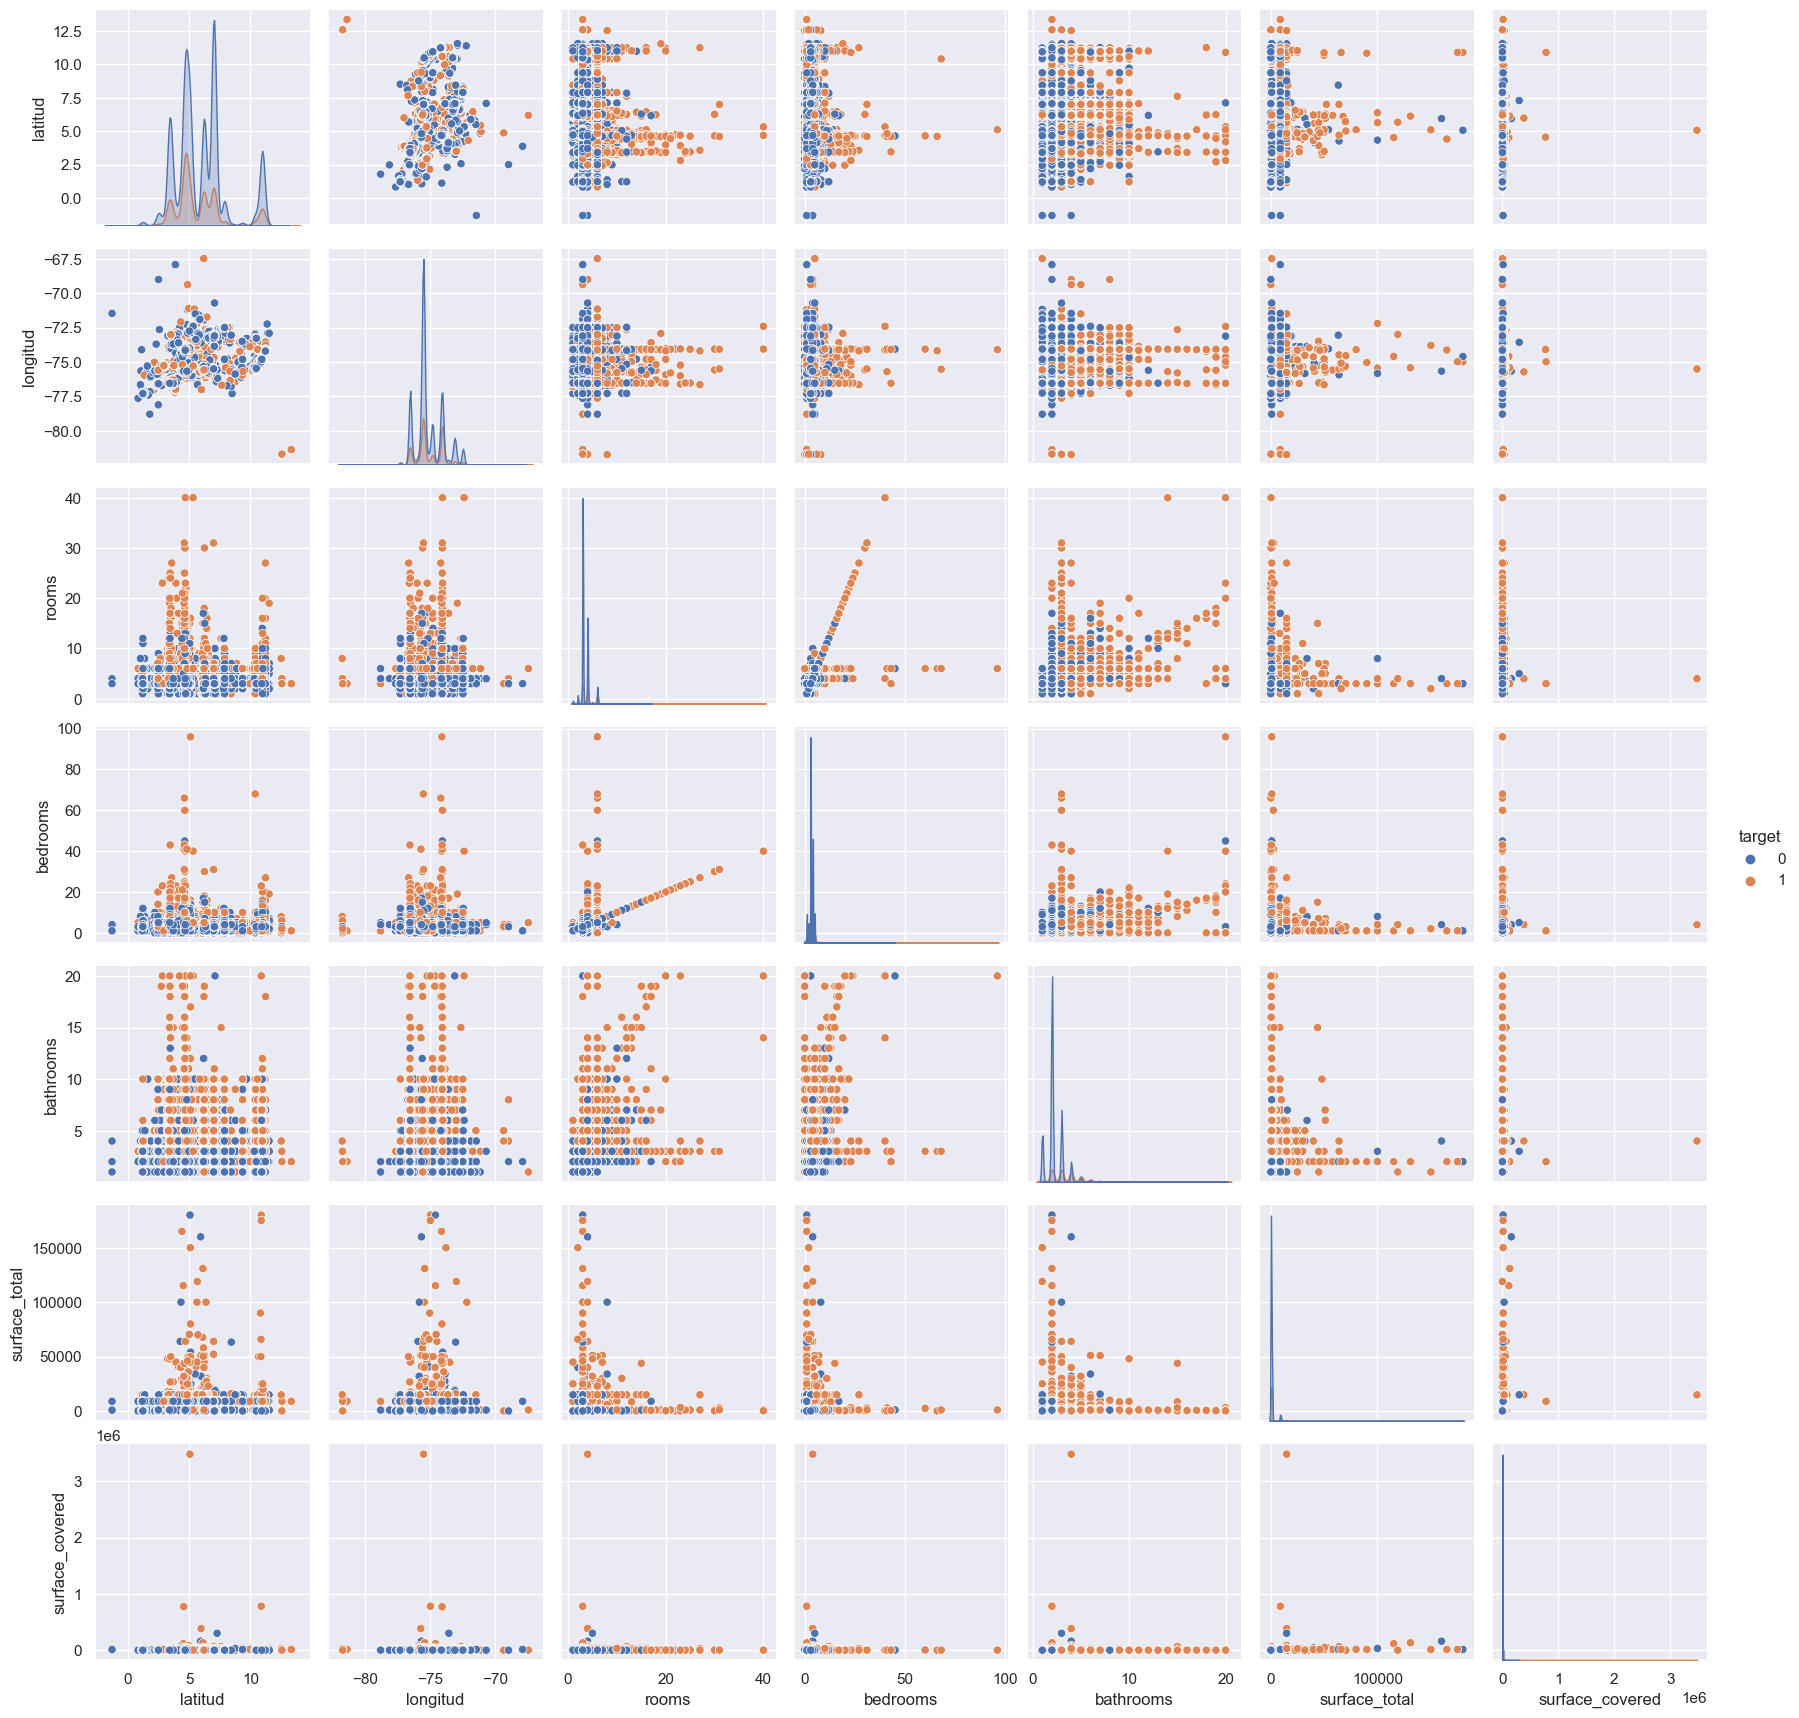

In [ ]:
sns.pairplot(train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']], hue='target')
plt.show()

In [117]:
df_num = df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']]
correlation = df_num.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= correlation, 
           yticklabels= correlation,
           cmap= 'coolwarm')

NameError: name 'df' is not defined

## Outliers

In [119]:
df_avance = train.copy()

In [121]:
train.reset_index(drop=True, inplace=True)

In [ ]:
# Function of practice develop to develop the correct function
def outliers(df):
    index_to_drop = []
    for c in df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        uw = q3 + 1.5*iqr
        lw = q1 - 1.5*iqr
        index_iteration = df[(df[c] < lw) | (df[c] > uw)].index
        index_iteration = list(index_iteration)
        index_to_drop += index_iteration
    return index_to_drop

revision = outliers(df)

len(revision)

def unique(lista):
    unique_l = []
    for i in lista:
        if i not in unique_l:
            unique_l.append(i)
    return unique_l

unique_l = unique(revision)
len(unique_l)

In [122]:
def outliers(df):
    index_to_drop = []
    for c in df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        uw = q3 + 1.5*iqr
        lw = q1 - 1.5*iqr
        index_iteration = df[(df[c] < lw) | (df[c] > uw)].index
        index_iteration = list(index_iteration)
        for i in index_iteration:
            if i not in index_to_drop:
                index_to_drop.append(i)
    return index_to_drop

In [123]:
outliers = outliers(train)
len(outliers)

65095

In [124]:
train.drop(outliers, axis=0, inplace=True)

In [125]:
train.shape

(131940, 14)

In [ ]:
df

In [ ]:
df_num = df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']]
df_num

In [ ]:
print(df_num.dtypes)

In [ ]:
correlation = df_num.corr()
correlation

you would expected NaN if the values do not vary. To see why take a look at correlation formula:

cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]

If the values of the ith or jth variable do not vary, then the respective standard deviation will be zero and so will the denominator of the fraction. Thus, the correlation will be NaN.

<AxesSubplot:>

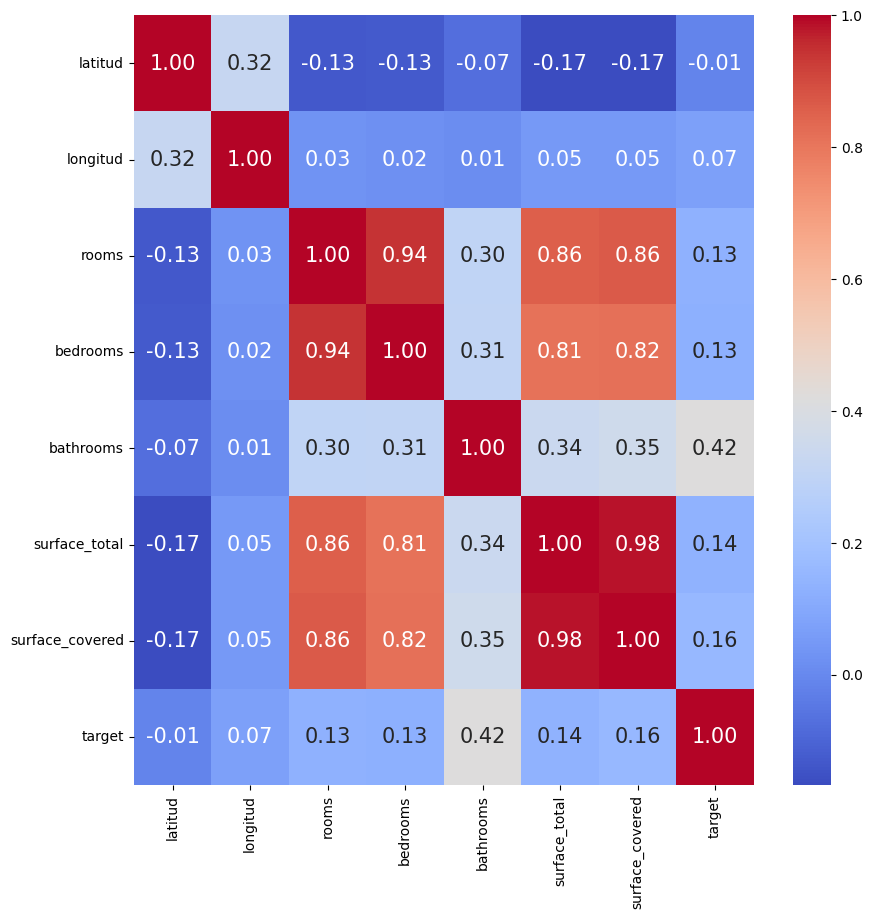

In [126]:
df_num = train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']]
correlation = df_num.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')

## Escalado/normalización

In [165]:
train

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,Venta,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,Venta,0
4,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
5,2020-12-17,2021-03-04,5.049009,-75.506802,Caldas,Manizales,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197027,2020-12-19,2021-03-02,7.000008,-73.250009,Santander,Bucaramanga,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
197028,2020-11-30,2021-05-19,7.064000,-73.106000,Santander,Floridablanca,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
197029,2020-08-11,2020-08-11,4.636047,-74.147480,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0
197030,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,Venta,0


In [166]:
train.fillna(0,inplace=True)

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131940 entries, 0 to 197033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       131940 non-null  datetime64[ns]
 1   end_date         131940 non-null  datetime64[ns]
 2   latitud          131940 non-null  float64       
 3   longitud         131940 non-null  float64       
 4   departamento     131940 non-null  object        
 5   municipio        131940 non-null  object        
 6   rooms            131940 non-null  float64       
 7   bedrooms         131940 non-null  float64       
 8   bathrooms        131940 non-null  float64       
 9   surface_total    131940 non-null  float64       
 10  surface_covered  131940 non-null  float64       
 11  property_type    131940 non-null  object        
 12  operation_type   131940 non-null  object        
 13  target           131940 non-null  int64         
dtypes: datetime64[ns](2)

In [168]:
df_num = train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
df_num

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,6.203000,-75.572000,4.0,4.0,4.0,897.0,300.0
1,4.722748,-74.073115,3.0,3.0,2.0,108.0,113.0
2,4.709000,-74.030000,4.0,4.0,2.0,897.0,300.0
4,7.000008,-75.500009,3.0,3.0,2.0,108.0,113.0
5,5.049009,-75.506802,3.0,3.0,2.0,108.0,113.0
...,...,...,...,...,...,...,...
197027,7.000008,-73.250009,3.0,3.0,2.0,108.0,113.0
197028,7.064000,-73.106000,3.0,3.0,2.0,108.0,113.0
197029,4.636047,-74.147480,3.0,3.0,2.0,108.0,113.0
197030,4.649682,-74.161950,3.0,3.0,2.0,108.0,113.0


In [169]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131940 entries, 0 to 197033
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   latitud          131940 non-null  float64
 1   longitud         131940 non-null  float64
 2   rooms            131940 non-null  float64
 3   bedrooms         131940 non-null  float64
 4   bathrooms        131940 non-null  float64
 5   surface_total    131940 non-null  float64
 6   surface_covered  131940 non-null  float64
dtypes: float64(7)
memory usage: 8.1 MB


In [144]:
# As the numerical variables have different measure scales and distributions, we are going to normalize the data using sklearn pre-processing functions.
# As there are several functions to rescale the data, we are going to apply a buch of them and see which one has better results.

# Import the desire library
from sklearn import preprocessing

In [170]:
# The MinMax scale the data taking the max and min value.It transform features by scaling each feature to a given range.
# The fit_transform receive the data and then transform and changed to numpy arrays.
data_min_max = preprocessing.MinMaxScaler().fit_transform(df_num)
data_min_max

array([[0.53800501, 0.33867969, 0.66666667, ..., 1.        , 0.43100926,
        0.5164076 ],
       [0.37972072, 0.61571351, 0.33333333, ..., 0.5       , 0.04631887,
        0.19343696],
       [0.37825059, 0.62368223, 0.66666667, ..., 0.5       , 0.43100926,
        0.5164076 ],
       ...,
       [0.37044971, 0.60196886, 0.33333333, ..., 0.5       , 0.04631887,
        0.19343696],
       [0.37190768, 0.5992943 , 0.33333333, ..., 0.5       , 0.04631887,
        0.19343696],
       [0.37460151, 0.60204331, 0.66666667, ..., 0.5       , 0.43100926,
        0.5164076 ]])

Debe ser correjido remplazando los valores de baño para parqueaderos por 0 que está mas adelante pero no ejecutado

In [146]:
# Debe ser borrado más adelante al igual que el comentario de abajo.
df_num_norm = df_num.copy()
df_num_norm.fillna(0, inplace=True)

In [171]:
# This function normalize the data using the magnitud of each vector (feature). It normalize samples individually to unit norm, in which each sample (each row of the data)
# is rescaled independently of other samples so that its norm  equals one.


# As this methods uses a division we are going to complete the 0 values of bathrooms in parqueaderos for 1. They are just 5 records of the 131940, so it is not going to affect the model.
#df_num_norm = df_num.copy()
#df_num_norm.fillna(0, inplace=True)

# As the normalizer function works with the rows and not the columns we use the transpossed.
data_normalized = preprocessing.Normalizer().fit_transform(df_num.T)
data_normalized = data_normalized.T
data_normalized

array([[ 0.00296826, -0.00276893,  0.00330211, ...,  0.00446689,
         0.00476799,  0.00424149],
       [ 0.00225993, -0.00271402,  0.00247658, ...,  0.00223345,
         0.00057407,  0.00159763],
       [ 0.00225335, -0.00271244,  0.00330211, ...,  0.00223345,
         0.00476799,  0.00424149],
       ...,
       [ 0.00221844, -0.00271674,  0.00247658, ...,  0.00223345,
         0.00057407,  0.00159763],
       [ 0.00222497, -0.00271727,  0.00247658, ...,  0.00223345,
         0.00057407,  0.00159763],
       [ 0.00223702, -0.00271673,  0.00330211, ...,  0.00223345,
         0.00476799,  0.00424149]])

In [172]:
# It works changing the data to obtain a standard deviation of 1 and a mean of 0, as some ml models work under the premise of data with a normal distribution.

# It transform features by scaling each feature to a given range usign the mean value of each feature.
data_standarized = preprocessing.StandardScaler().fit_transform(df_num)

# It transform features by scaling each feature to a given range usign the interquantile range of each feature. This functions work under the premise of avoiding outliers because they make noise.
data_standarized_robust = preprocessing.RobustScaler().fit_transform(df_num)

data_standarized, data_standarized_robust

(array([[ 0.43089249, -0.41932943,  1.33599212, ...,  2.06002315,
          1.44536964,  1.42991057],
        [-0.54604694,  1.00488647, -0.55252917, ..., -0.40383658,
         -0.68986709, -0.68297096],
        [-0.55512071,  1.04585324,  1.33599212, ..., -0.40383658,
          1.44536964,  1.42991057],
        ...,
        [-0.60326818,  0.93422599, -0.55252917, ..., -0.40383658,
         -0.68986709, -0.68297096],
        [-0.59426952,  0.92047617, -0.55252917, ..., -0.40383658,
         -0.68986709, -0.68297096],
        [-0.57764305,  0.93460872,  1.33599212, ..., -0.40383658,
          1.44536964,  1.42991057]]),
 array([[ 0.47558777, -0.04854447,  1.        , ...,  2.        ,
          1.        ,  1.        ],
        [-0.15216717,  0.96216786,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.15799773,  0.99124044,  1.        , ...,  0.        ,
          1.        ,  1.        ],
        ...,
        [-0.188936  ,  0.91202279,  0.        , ...,  

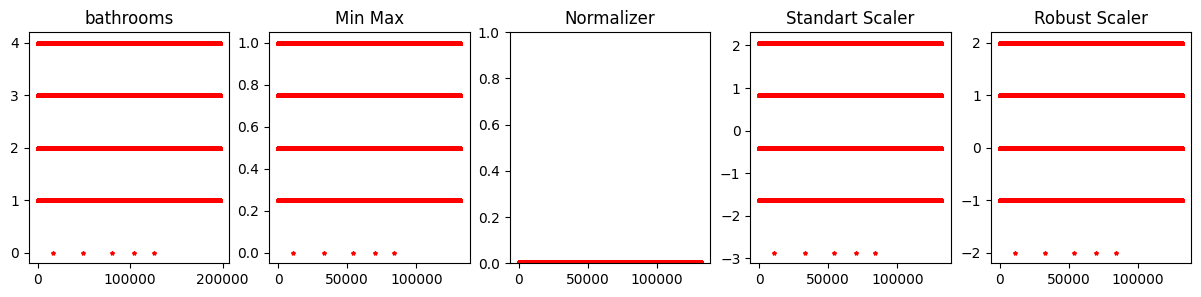

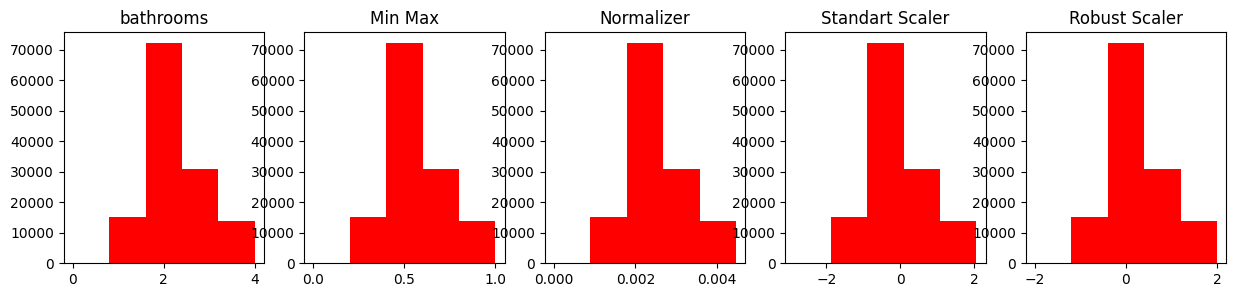

In [173]:
# Conversion of numpy arrays (vectors) into Dataframes to graph them.
data_min_max = pd.DataFrame(data_min_max, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
data_normalized = pd.DataFrame(data_normalized, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
data_standarized = pd.DataFrame(data_standarized, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
data_standarized_robust = pd.DataFrame(data_standarized_robust, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])

# Creation of a figure of 5 subplots to compare the methods appleid.
fig = plt.figure(figsize = (15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Personalization of the different subplots.
ax1.set_title('bathrooms')
ax1.plot(df_num['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax2.set_title('Min Max')
ax2.plot(data_min_max['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax3.set_title('Normalizer')
ax3.plot(data_normalized['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)
ax3.set_ylim(0, 1)

ax4.set_title('Standart Scaler')
ax4.plot(data_standarized['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax5.set_title('Robust Scaler')
ax5.plot(data_standarized_robust['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

plt.show()

# Creation of a figure of 5 subplots to illustrate the histograms.
fig = plt.figure(figsize = (15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title('bathrooms')
ax1.hist(df_num['bathrooms'], linewidth = 0, color='r', bins=5)

ax2.set_title('Min Max')
ax2.hist(data_min_max['bathrooms'], linewidth = 0, color='r', bins=5)

ax3.set_title('Normalizer')
ax3.hist(data_normalized['bathrooms'], linewidth = 0, color='r', bins=5)

ax4.set_title('Standart Scaler')
ax4.hist(data_standarized['bathrooms'], linewidth = 0, color='r', bins=5)

ax5.set_title('Robust Scaler')
ax5.hist(data_standarized_robust['bathrooms'], linewidth = 0, color='r', bins=5)

plt.show()

In [ ]:
# We graph the information for bathrooms as is the feature with more correlation with the column target.
# As we can see the data has been normalized and it all look the same. However we can see that in the histograms the scale range has change. In the scatter plots that looks like line in the y axis we can see tjat the data have different scales.

### Arbol

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131940 entries, 0 to 131939
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   latitud          131940 non-null  float64
 1   longitud         131940 non-null  float64
 2   rooms            131940 non-null  float64
 3   bedrooms         131940 non-null  float64
 4   bathrooms        131940 non-null  float64
 5   surface_total    131940 non-null  float64
 6   surface_covered  131940 non-null  float64
dtypes: float64(7)
memory usage: 7.0 MB


In [174]:
X = data_standarized[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = train['target']

In [161]:
dtc_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [176]:
dtc_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [177]:
print('Clases de la variable de salida;',dtc_model.classes_)
print('Número de clases:',dtc_model.n_classes_)
print('Número de atributos:',dtc_model.max_features_)
print('Importancia de las variables:',dtc_model.feature_importances_)
# Podemos ver que el atributo que más tiene peso es el sexo (sex_encode) y después la clase (p_calss).

Clases de la variable de salida; [0 1]
Número de clases: 2
Número de atributos: 7
Importancia de las variables: [0.18139634 0.02098387 0.         0.         0.79761979 0.
 0.        ]


In [182]:
test_corrected = pd.read_csv('test_corrected')
test_corrected.drop('Unnamed: 0',axis=1,inplace=True)
test_corrected

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.581880,1.011393,-0.245778,-0.205585,0.334839,-0.184358,-0.125843
1,0.487954,-0.384871,-0.245778,-0.205585,0.334839,-0.377981,0.002527
2,0.140069,-0.510654,0.642990,0.580032,-1.207870,-0.034238,0.002527
3,0.113650,-0.439733,-2.023312,-1.776818,-0.436515,0.576226,0.002527
4,0.487954,-0.384871,0.642990,0.580032,-0.436515,-0.034238,0.002527
...,...,...,...,...,...,...,...
65845,0.118338,-0.482207,-0.245778,-0.205585,-0.436515,-0.377981,0.002527
65846,-0.431910,-0.397027,-0.245778,-0.205585,-1.207870,-0.377981,0.002527
65847,-0.420920,-0.551992,1.531757,1.365649,-0.436515,-0.036734,0.002527
65848,0.553061,1.939965,-0.245778,-0.205585,-0.436515,-0.377981,0.002527


In [184]:
y_pred = dtc_model.predict(X)

In [196]:
X_test = test_corrected[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

In [197]:
y_test_pred = dtc_model.predict(X_test)

In [198]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [199]:
test_precdictions = pd.DataFrame()

In [200]:
test_precdictions['Pred'] = y_test_pred
test_precdictions

,Pred
0,0
1,0
2,0
3,0
4,0
...,...
65845,0
65846,0
65847,0
65848,0


In [201]:
test_precdictions.to_csv('oscarmarinoa.csv', index=False)

In [ ]:
y_test_pred.to

In [190]:
print('The accuracy of the model is',accuracy_score(y, y_pred))

The accuracy of the model is 0.8715855691981204


In [188]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y, y_pred)
matrix

array([[109263,   3862],
       [ 13081,   5734]], dtype=int64)

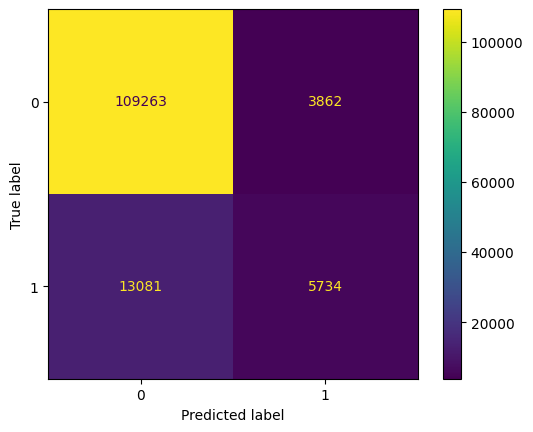

In [189]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [195]:
from sklearn.metrics import recall_score

precision = recall_score(y, y_pred, average= 'micro')
print(precision)

0.8715855691981204
